In [10]:
import cv2
import math
import os
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import random

from PIL import Image, ImageDraw, ImageFilter


src = cv2.imread("./train/TRAIN_113136.png")

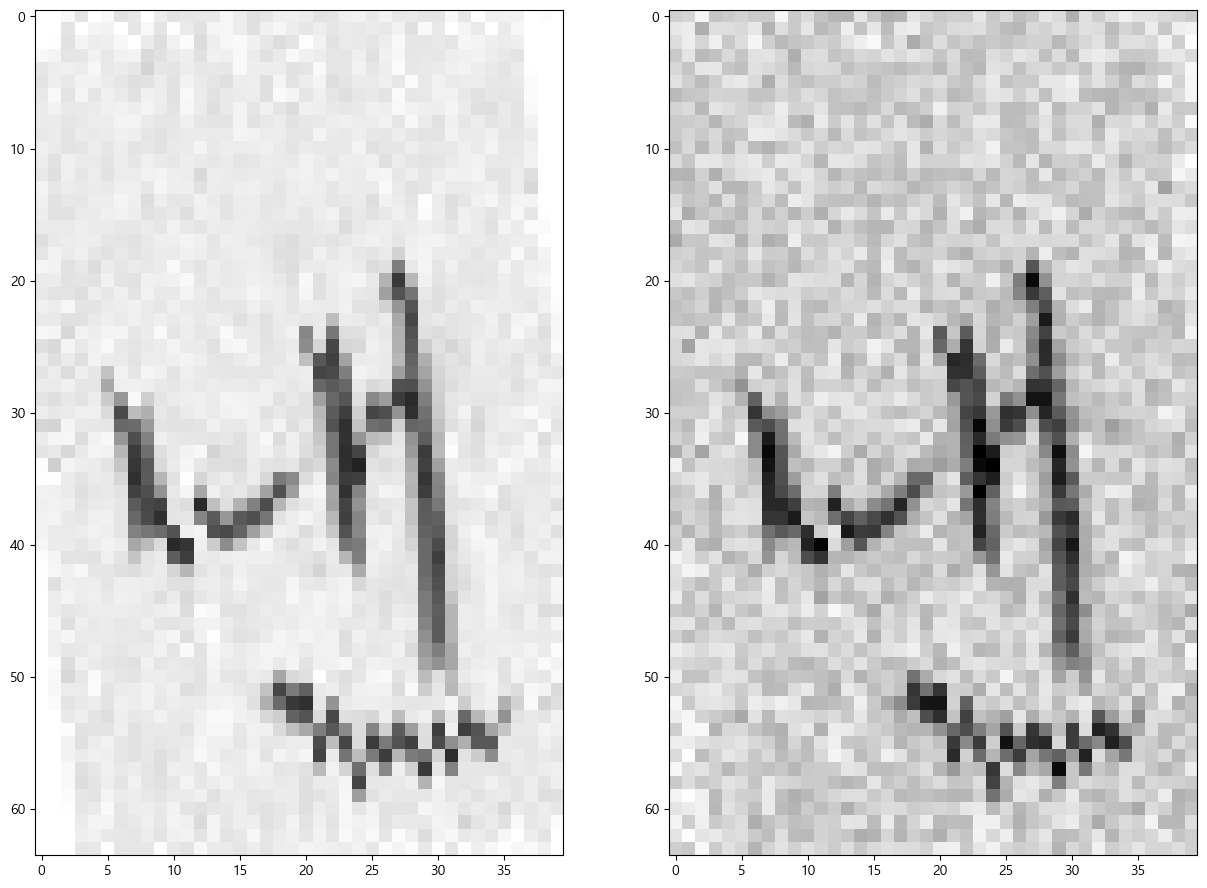

In [11]:
# 노이즈 타입1

def noise_type1(src):
    h,w,c = src.shape
    noise = np.random.randint(-55,0, size=(h,w,1))
    noise2 = np.append(noise, noise, axis=2)
    noise_type1 = np.append(noise2, noise, axis=2)
    return np.clip(noise_type1+src, 0, 255)


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(noise_type1(src))

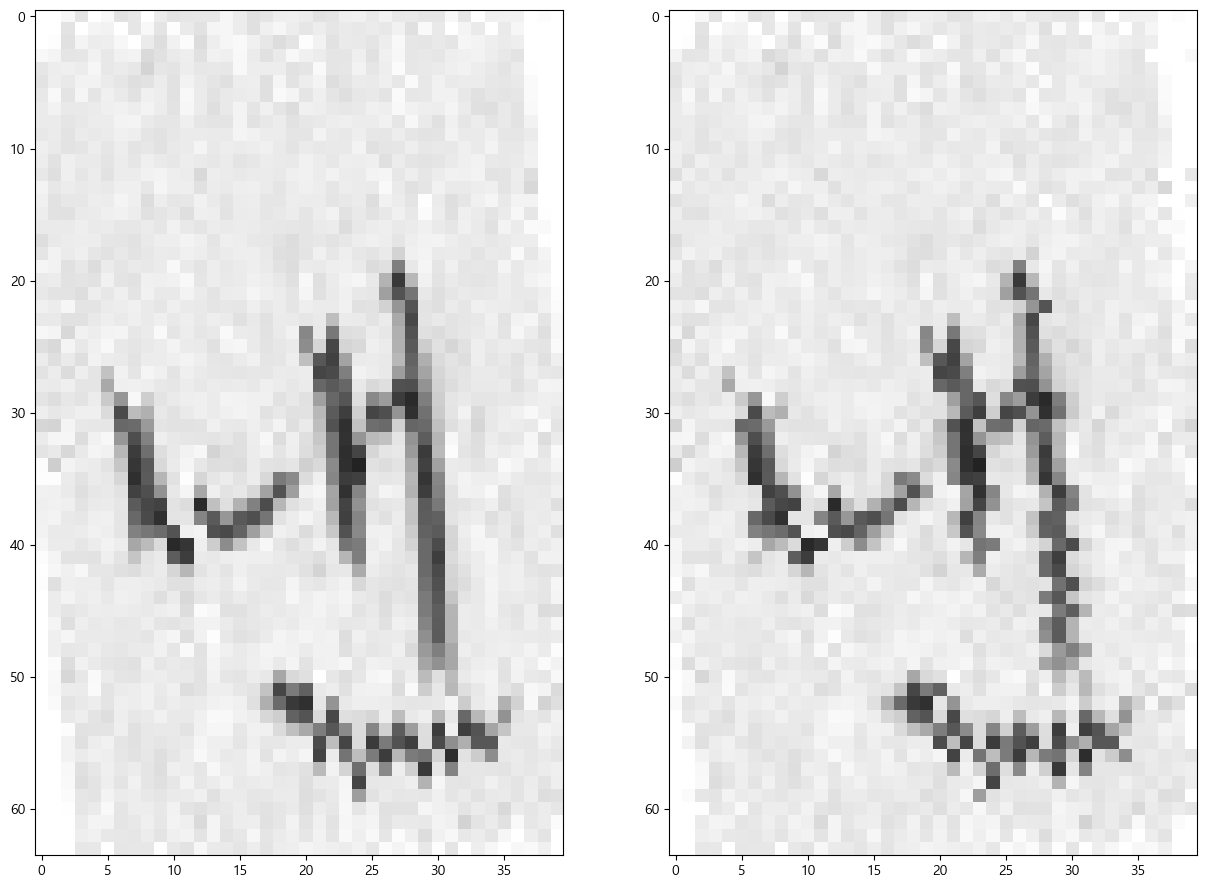

In [12]:
# 노이즈 타입2

def noise_type2(src):
    h,w,c = src.shape
    noise_type2_list=[]
    shift_param = int(w/30)
    if shift_param==0:
        shift_param=1
    for i in src:
        shift = random.randrange(-shift_param,shift_param)
        shifted = np.roll(i, shift=shift, axis=0)
        noise_type2_list.append(shifted)
    return np.array(noise_type2_list)


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(noise_type2(src))
plt.show()

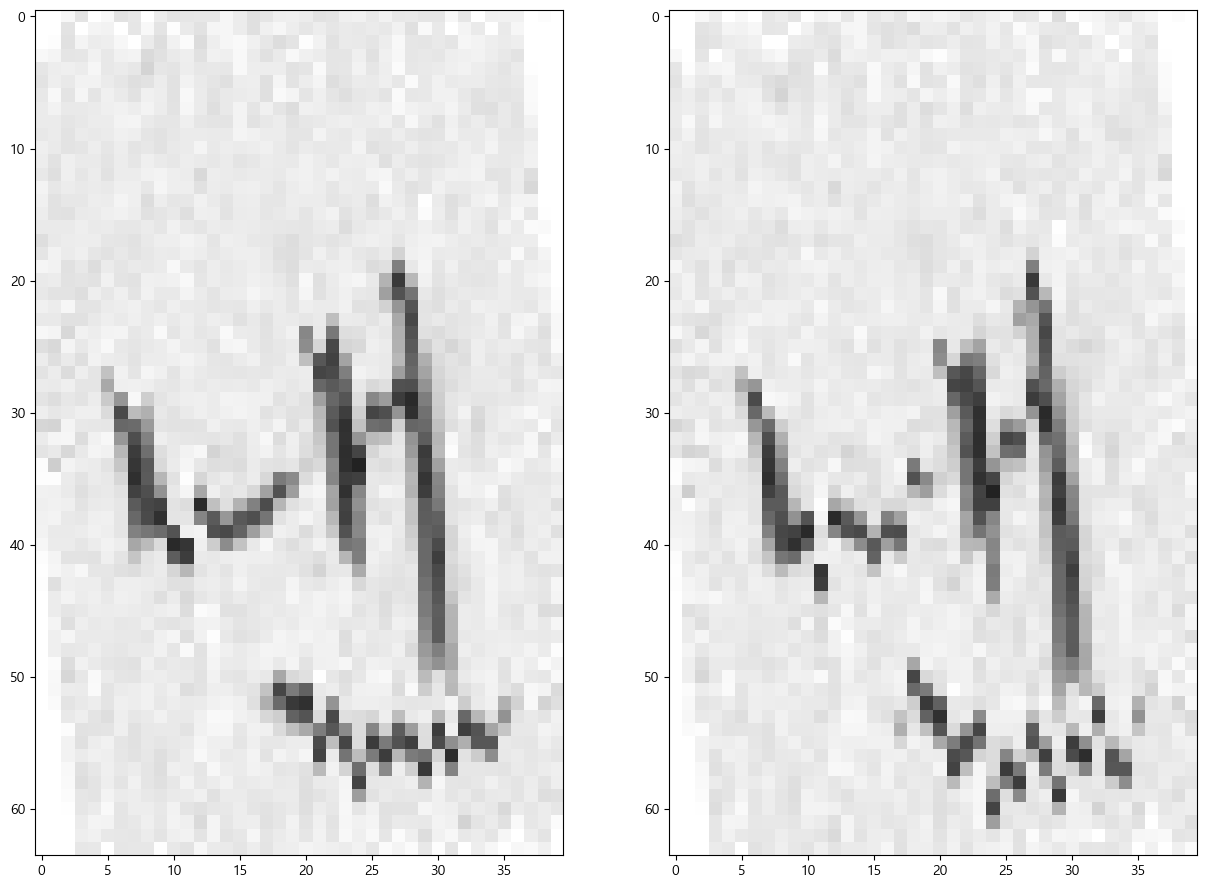

In [13]:
# 노이즈 타입 3

def noise_type3(src):
    noise_type3_list=[]
    src_rot = np.rot90(src, 3)
    h,w,c = src_rot.shape
    
    shift_param = int(w/30)
    for i in src_rot:
        shift = random.randrange(-shift_param,shift_param)
        shifted = np.roll(i, shift=shift, axis=0)
        noise_type3_list.append(shifted)
        
    noise_type3_list = np.rot90(noise_type3_list, 1)
    
    return np.array(noise_type3_list)


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(noise_type3(src))

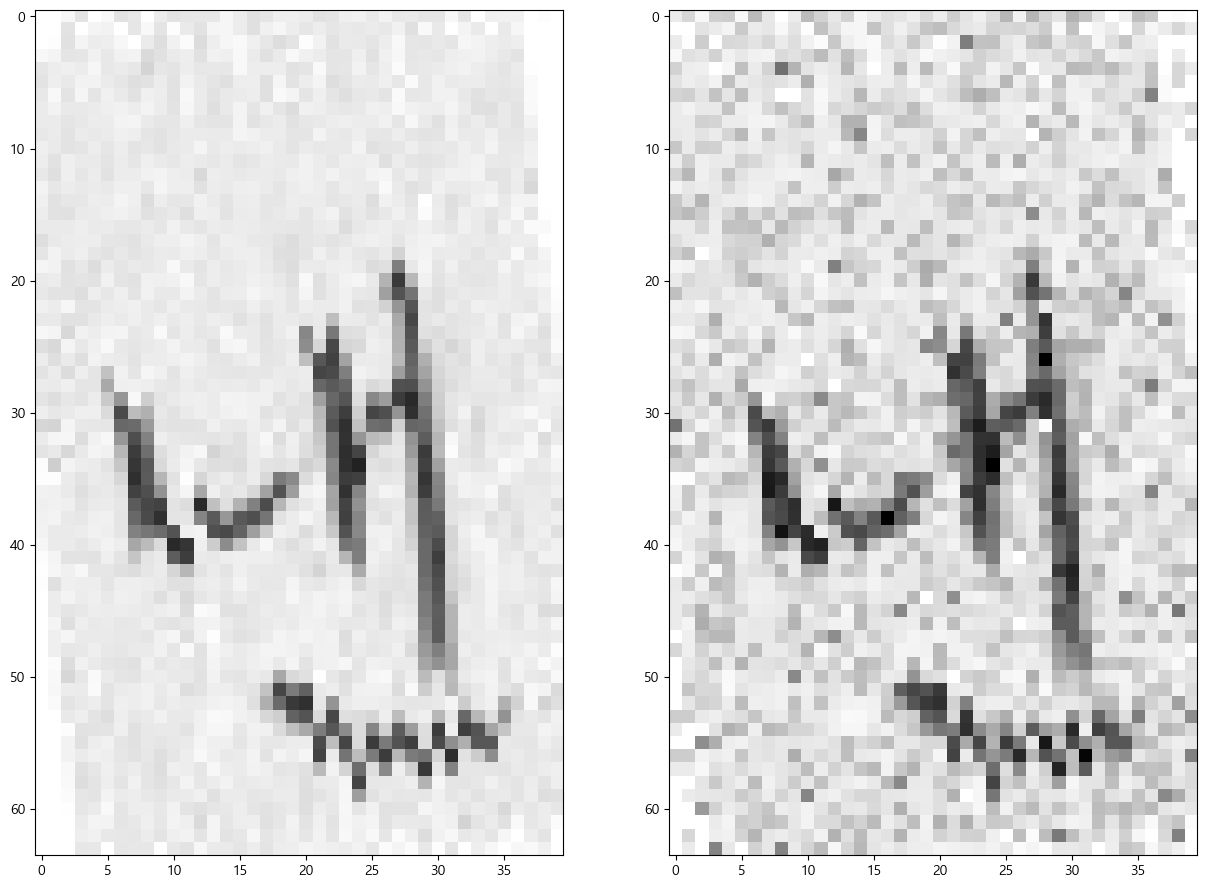

In [14]:
# 노이즈 타입 4

def noise_type4(src):
    h,w,c = src.shape
    noise_type4_list=[]
    noise = np.random.choice([0,-20,-40,-50,-100,150], size=(h,w,1), p = [0.6, 0.2, 0.1, 0.08, 0.015, 0.005])
    noise2 = np.append(noise, noise, axis=2)
    noise_type4_list = np.append(noise2, noise, axis=2)
    
    return np.clip(src + noise_type4_list, 0, 255)


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(noise_type4(src))

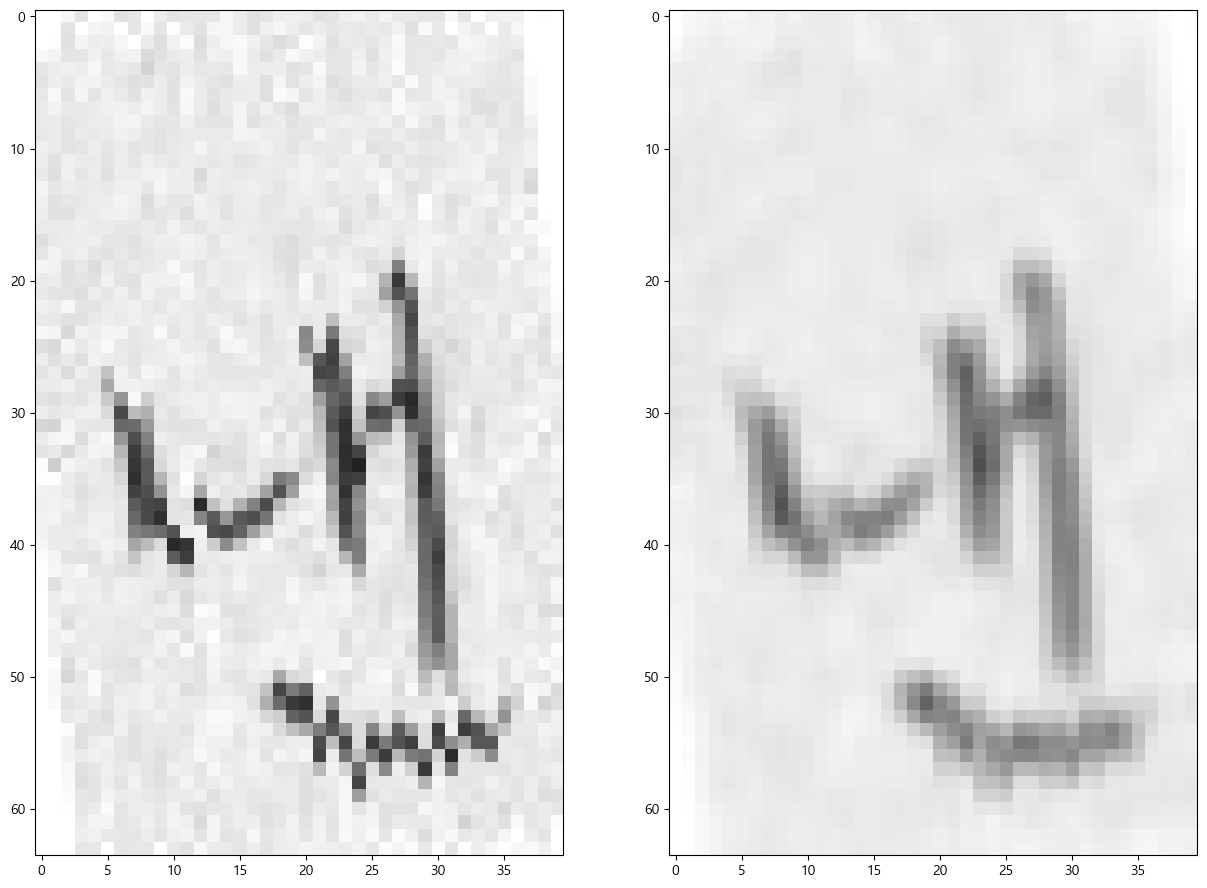

In [15]:
# 노이즈 타입5

def noise_type5(src):
    
    return cv2.blur(src, ksize=(3,3))


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(noise_type5(src))

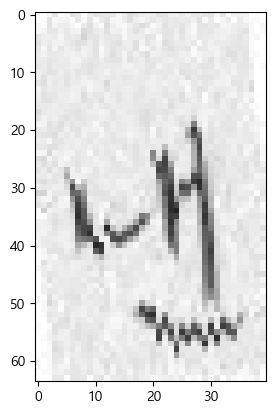

In [16]:
# 노이즈 타입 6

import cv2
import math
import os
import random as rnd
import numpy as np

from PIL import Image, ImageDraw, ImageFilter

def noise_type6(src):
    height, width, _ = src.shape
    image = Image.new("L", (width, height))
    pixels = image.load()

    frequency = rnd.random() * 30 + 20  # frequency
    phase = rnd.random() * 2 * math.pi  # phase
    rotation_count = rnd.randint(10, 20)  # of rotations

    for kw in range(width):
        y = float(kw) / (width - 1) * 4 * math.pi - 2 * math.pi
        for kh in range(height):
            x = float(kh) / (height - 1) * 4 * math.pi - 2 * math.pi
            z = 0.0
            for i in range(rotation_count):
                r = math.hypot(x, y)
                a = math.atan2(y, x) + i * math.pi * 2.0 / rotation_count
                z += math.cos(r * math.sin(a) * frequency + phase)
            c = int(255 - round(255 * z / rotation_count))
            pixels[kw, kh] = c  # grayscale
    
    result = np.array(image.convert("RGB"))    
    
    return ((src>result)*result)+((src<=result)*src)

plt.imshow(noise_type6(src))

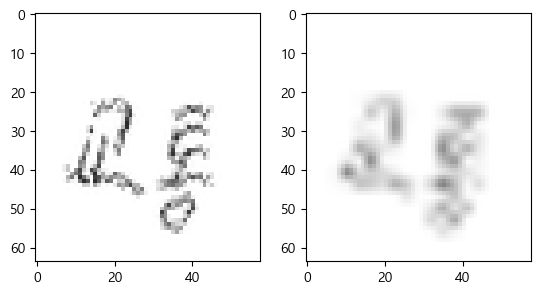

In [17]:
# 추가할 노이즈 타입들

# 노이즈 타입 7

src = cv2.imread("./train/TRAIN_00041.png")
h,w,c = src.shape

img = cv2.resize(src, (w//3, h//3))
img = cv2.resize(img, (w, h))


plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
plt.imshow(img)

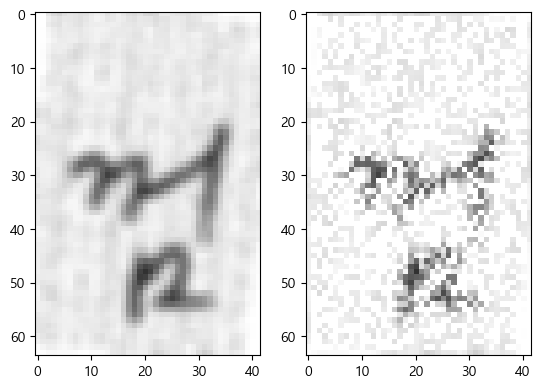

In [41]:
# 노이즈 타입 8

# random.randrange(1,1)

np.array([[1,random.choices([0.1,-0.1, 0.2, -0.2], weights = [0.25, 0.25, 0.25, 0.25])[0],1]])

def my_filter(src, kernel_size):
    h,w,c = src.shape
    filtered_img = np.array(src)[:,:,0].view()
    filtered_img = filtered_img.reshape(h,w,1)
    
    for i in range((kernel_size//2), h-(kernel_size//2)):
        for j in range((kernel_size//2), w-(kernel_size//2)):

            middle_point = random.choices([1,2,3], weights = [0.5, 0.3, 0.2])[0]
            
#             kernel = np.array([[1,1,1],[1,middle_point,1],[1,1,1]])
            kernel_top = np.random.randint(0,1,size=[1,3])
            kernel_mid = np.array([[0,random.choices([1,1.5, 2, 3], weights = [0.4, 0.3, 0.2, 0.1])[0],0]])
            kernel_bottom = np.random.randint(0,1,size=[1,3])
            
            kernel = np.concatenate((kernel_top, kernel_mid, kernel_bottom))

            filtered_img[i, j] = int(np.clip(np.sum(np.multiply(src[i-(kernel_size//2):i+(kernel_size//2)+1, j-(kernel_size//2):j+(kernel_size//2)+1, 0], kernel)), 0, 255))
            
    filtered_img = np.repeat(filtered_img, repeats=3, axis=2)
    return filtered_img

src = cv2.imread("./train/TRAIN_111634.png")
plt.subplot(1,2,1)
plt.imshow(src)
plt.subplot(1,2,2)
result = my_filter(src, 3)
plt.imshow(result)
# plt.imshow(result[0:4])